In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.stats import skew, kurtosis

In [2]:
"make_results/10_folds_results/fold_0_blr/batch_1/Z_estimate.txt"
"make_results/10_folds_results/fold_0_SHASHb/batch_1/MCMC_zscores/MCMC_zscores_0_SHASHb_fold0.pkl"

'make_results/10_folds_results/fold_0_SHASHb/batch_1/MCMC_zscores/MCMC_zscores_0_SHASHb_fold0.pkl'

In [6]:
all_zscores = {}
# For each feature
features = ['Right-Cerebellum-White-Matter',
            'EstimatedTotalIntraCranialVol',
            'Right-Lateral-Ventricle',
            'WM-hypointensities',
            'rh_S_interm_prim-Jensen_thickness', 
            'Brain-Stem']
for fold in range(10):
    for iff, feature in enumerate(features):
        for l in ['SHASHb_1','SHASHb_2','Normal']:
            with open(f"10_folds_results/fold_{fold}_{l}/batch_{iff+1}/MAP_zscores/MAP_zscores_{iff}_{l}_fold{fold}.pkl",'rb') as file:
                all_zscores[(fold, iff, l)] = pickle.load(file)
        all_zscores[(fold, iff, 'blr')] = np.loadtxt(f"10_folds_results/fold_{fold}_blr/batch_{iff+1}/Z_estimate.txt")

In [7]:
foldclasses = {}
testXs = {}
testYs = {}
unique_classes = []
for fold in range(10):
    with open(f"/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_{fold}/Z_test.pkl",'rb') as file:
        foldclasses[fold] = pickle.load(file)
        unique_classes = np.unique(foldclasses[fold]['site_id'].to_numpy())
    with open(f"/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_{fold}/X_test.pkl",'rb') as file:
        testXs[fold] = pickle.load(file).to_numpy()
    with open(f"/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_{fold}/Y_test.pkl",'rb') as file:
        testYs[fold] = pickle.load(file)

In [12]:
def rsquare(z):
    cz = np.sort(np.reshape(z, (-1,)))
    true_z = np.sort(np.random.randn(cz.shape[0]))
    return 1-np.mean((cz-true_z)**2)/np.mean(cz**2)

def meanr2(z, n=10):
    return sum([rsquare(z) for i in range(n)])/n

print(meanr2(np.random.randn(1000)))


def make_moments_of_subsets(feature, lik, moment, vlims=(0,1),colorbar=False, ylabel=False):
    momentfuncmap = {1:np.mean, 2:np.var, 3:skew, 4:kurtosis, 5:meanr2}
    func = momentfuncmap[moment]
    momentstringmap = {1:'mean', 2:'variance', 3:'skew', 4:'kurtosis', 5:'meanr2'}
    momentstring = momentstringmap[moment]
    n_ls = 8
    storage = np.zeros((n_ls, 2**(n_ls-1)))   
#     fig = plt.figure(figsize=(4,4))
    for fold in range(10):
        z = all_zscores[(fold, feature, lik)]
        X = testXs[fold]
        minx = np.min(X[:,0])
        maxx = np.max(X[:,0]-7)

        for i in range(n_ls):
            l = np.linspace(minx, maxx, 2**i+1, endpoint=True)
            for il in range(2**i):
                idx = np.logical_and((X[:,0] >= l[il]),(X[:,0] <= l[il+1]))
                zs = z[idx]
                if zs.shape[0] > 0:
                    col = np.abs(func(zs)-vlims[0])
                    block_width = storage.shape[1]//(l.shape[0]-1)
                    storage[i,il*block_width:(il+1)*block_width] += col
    
    width = maxx-minx
    height = n_ls
    aspect = width/height
    if colorbar:
        c = plt.imshow(storage/10,aspect = aspect,vmin=0, vmax = vlims[1], extent = [minx, maxx, n_ls, 0], interpolation='none')
        plt.colorbar(c)
    else:
        plt.imshow(storage/10,aspect = aspect,vmin=0, vmax = vlims[1], extent = [minx, maxx, n_ls, 0], interpolation='none')
    lmap = {'blr':'W-BLR','SHASHo':'$\mathcal{S}_o$', 'SHASHb_1':'$\mathcal{S}_{b1}$','SHASHb_2':'$\mathcal{S}_{b2}$',  'Normal':'$\mathcal{N}$'}

    plt.title(f'{lmap[lik]}', fontsize=14)
    locs, texts = plt.yticks()
    ns = locs[:-1]
    texts = map(lambda x: int(2**x), ns)
    
    plt.yticks(ns+0.5, texts, fontsize=12)
    if ylabel:
        plt.ylabel('Bins', fontsize=12)
#     plt.xticks(fontsize=12)
    plt.xlabel('Age', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/subset_moments_images/{momentstring}_{features[feature]}_{lik}.png',bbox_inches='tight', dpi = 300)
#     plt.xticks(np.arange(0,17,2),np.round(np.linspace(minx, maxx,9),2))
    plt.show()
    plt.close()

0.9955424073027267


blr Right-Cerebellum-White-Matter 0


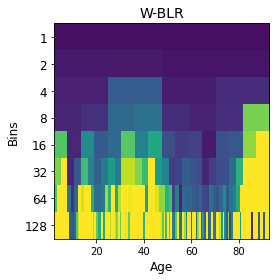

Normal Right-Cerebellum-White-Matter 0


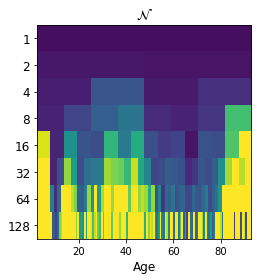

SHASHb_1 Right-Cerebellum-White-Matter 0


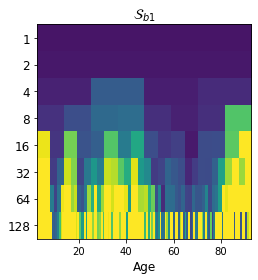

SHASHb_2 Right-Cerebellum-White-Matter 0


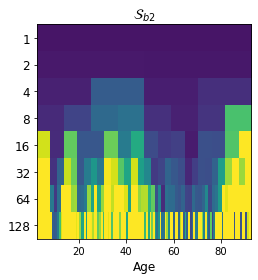

blr Right-Cerebellum-White-Matter 1


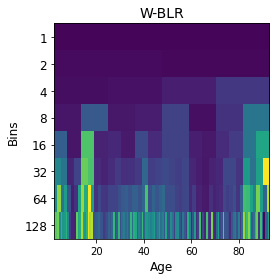

Normal Right-Cerebellum-White-Matter 1


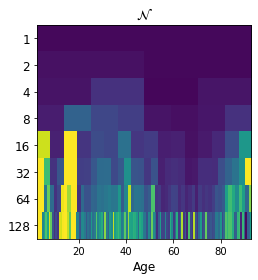

SHASHb_1 Right-Cerebellum-White-Matter 1


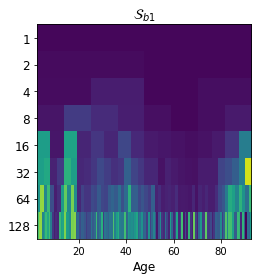

SHASHb_2 Right-Cerebellum-White-Matter 1


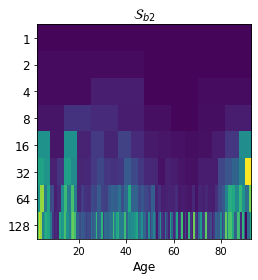

blr Right-Cerebellum-White-Matter 2


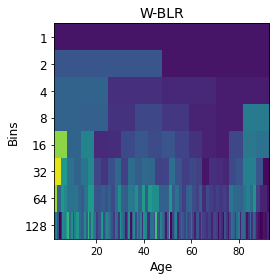

Normal Right-Cerebellum-White-Matter 2


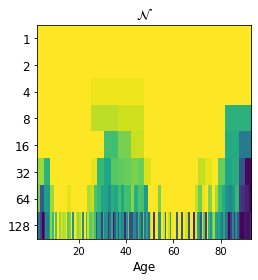

SHASHb_1 Right-Cerebellum-White-Matter 2


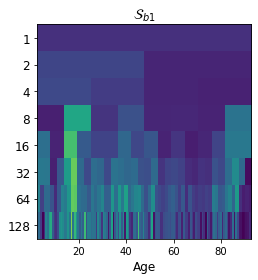

SHASHb_2 Right-Cerebellum-White-Matter 2


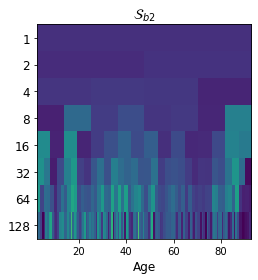

blr Right-Cerebellum-White-Matter 3


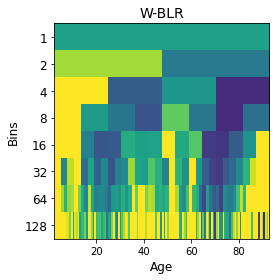

Normal Right-Cerebellum-White-Matter 3


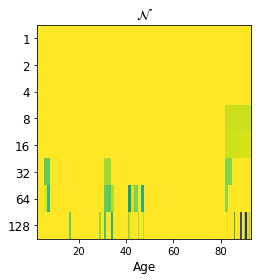

SHASHb_1 Right-Cerebellum-White-Matter 3


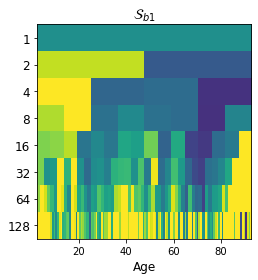

SHASHb_2 Right-Cerebellum-White-Matter 3


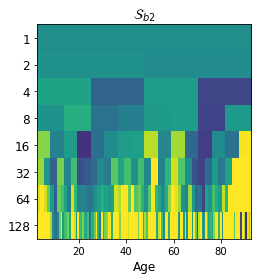

blr EstimatedTotalIntraCranialVol 0


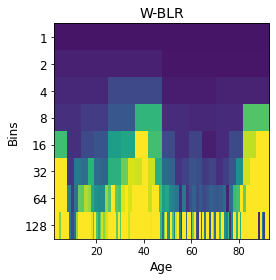

Normal EstimatedTotalIntraCranialVol 0


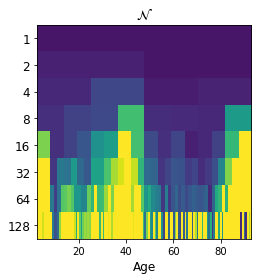

SHASHb_1 EstimatedTotalIntraCranialVol 0


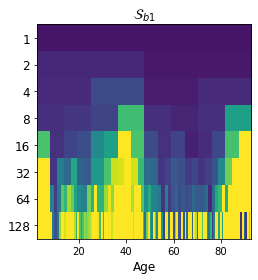

SHASHb_2 EstimatedTotalIntraCranialVol 0


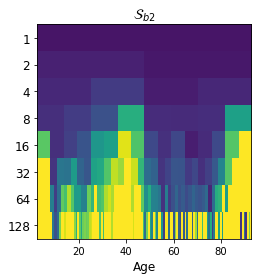

blr EstimatedTotalIntraCranialVol 1


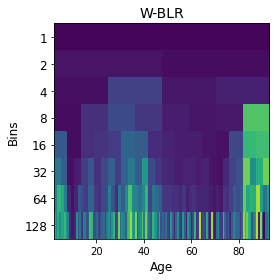

Normal EstimatedTotalIntraCranialVol 1


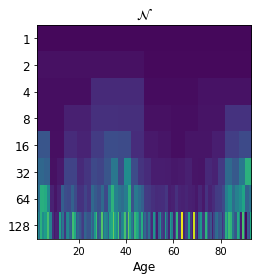

SHASHb_1 EstimatedTotalIntraCranialVol 1


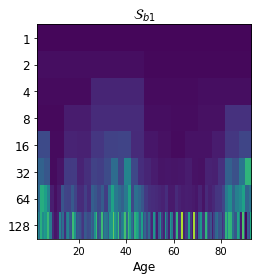

SHASHb_2 EstimatedTotalIntraCranialVol 1


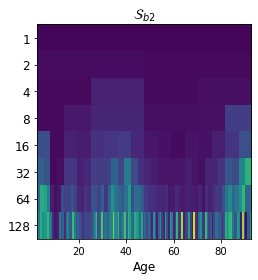

blr EstimatedTotalIntraCranialVol 2


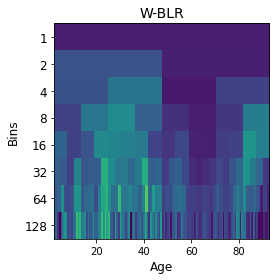

Normal EstimatedTotalIntraCranialVol 2


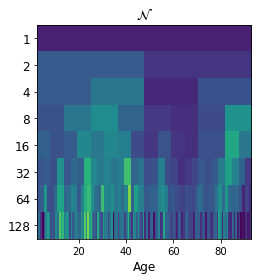

SHASHb_1 EstimatedTotalIntraCranialVol 2


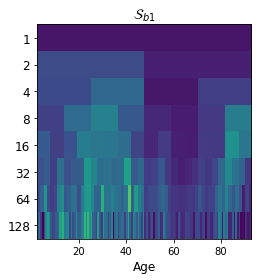

SHASHb_2 EstimatedTotalIntraCranialVol 2


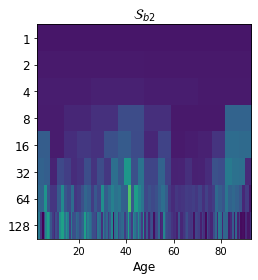

blr EstimatedTotalIntraCranialVol 3


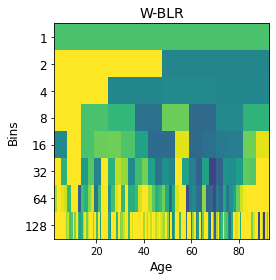

Normal EstimatedTotalIntraCranialVol 3


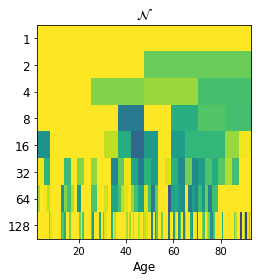

SHASHb_1 EstimatedTotalIntraCranialVol 3


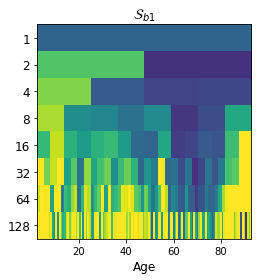

SHASHb_2 EstimatedTotalIntraCranialVol 3


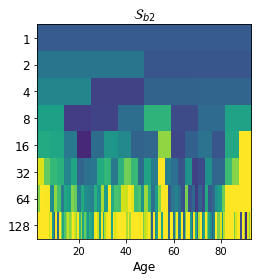

blr Right-Lateral-Ventricle 0


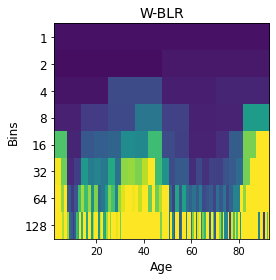

Normal Right-Lateral-Ventricle 0


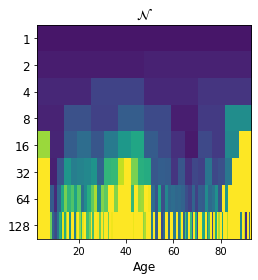

SHASHb_1 Right-Lateral-Ventricle 0


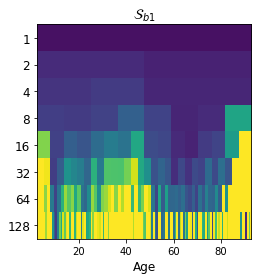

SHASHb_2 Right-Lateral-Ventricle 0


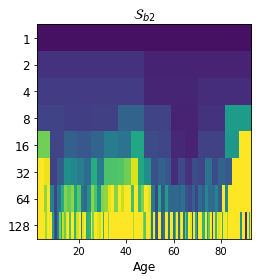

blr Right-Lateral-Ventricle 1


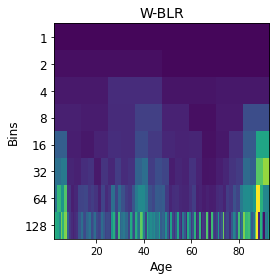

Normal Right-Lateral-Ventricle 1


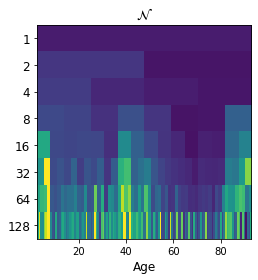

SHASHb_1 Right-Lateral-Ventricle 1


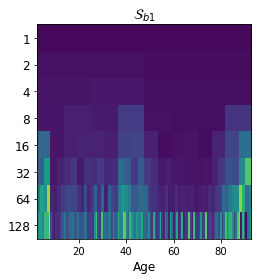

SHASHb_2 Right-Lateral-Ventricle 1


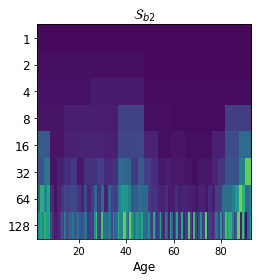

blr Right-Lateral-Ventricle 2


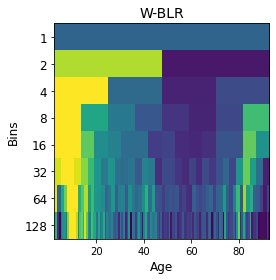

Normal Right-Lateral-Ventricle 2


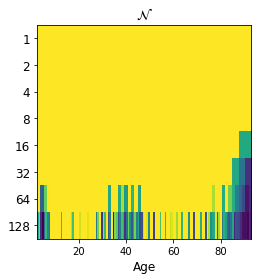

SHASHb_1 Right-Lateral-Ventricle 2


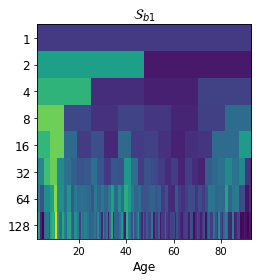

SHASHb_2 Right-Lateral-Ventricle 2


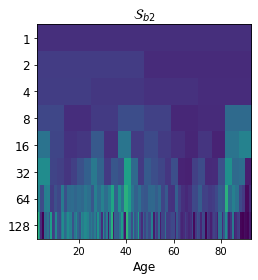

blr Right-Lateral-Ventricle 3


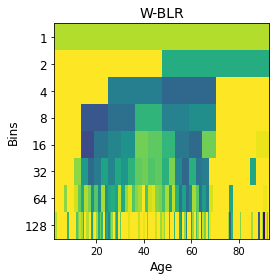

Normal Right-Lateral-Ventricle 3


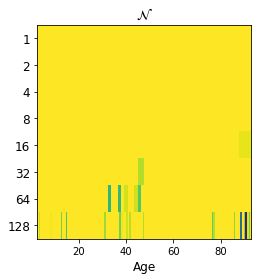

SHASHb_1 Right-Lateral-Ventricle 3


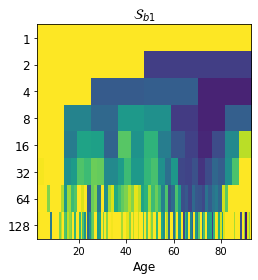

SHASHb_2 Right-Lateral-Ventricle 3


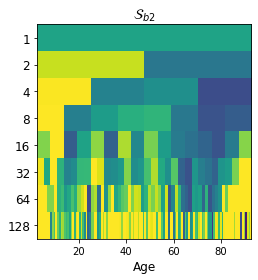

blr WM-hypointensities 0


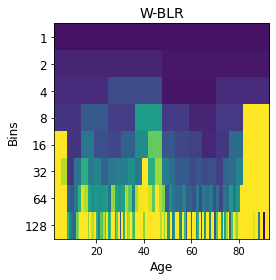

Normal WM-hypointensities 0


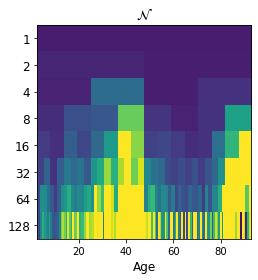

SHASHb_1 WM-hypointensities 0


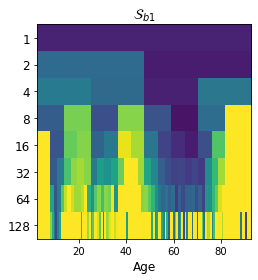

SHASHb_2 WM-hypointensities 0


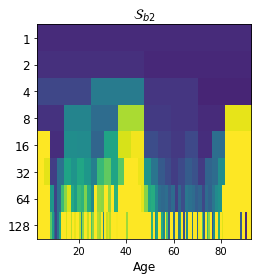

blr WM-hypointensities 1


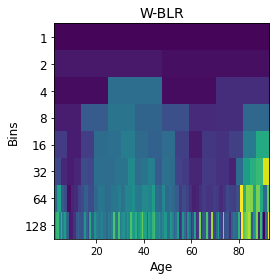

Normal WM-hypointensities 1


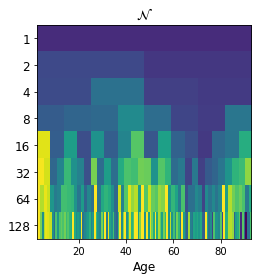

SHASHb_1 WM-hypointensities 1


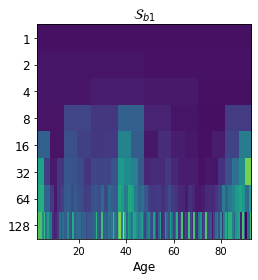

SHASHb_2 WM-hypointensities 1


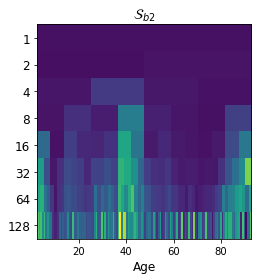

blr WM-hypointensities 2


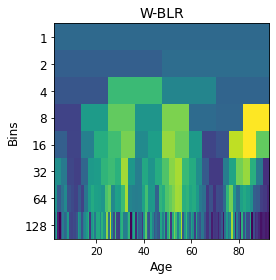

Normal WM-hypointensities 2


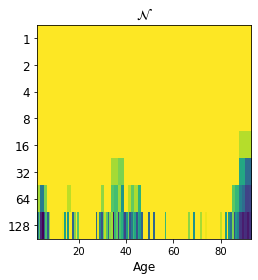

SHASHb_1 WM-hypointensities 2


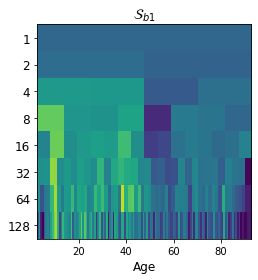

SHASHb_2 WM-hypointensities 2


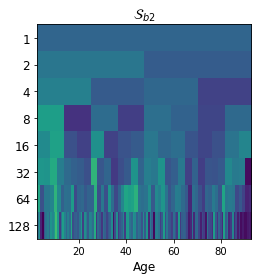

blr WM-hypointensities 3


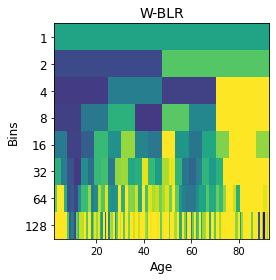

Normal WM-hypointensities 3


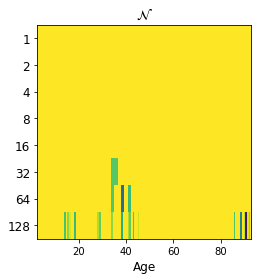

SHASHb_1 WM-hypointensities 3


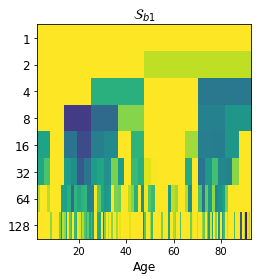

SHASHb_2 WM-hypointensities 3


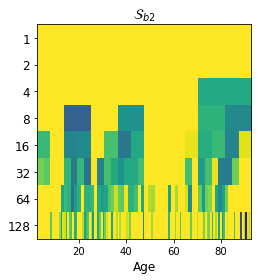

blr rh_S_interm_prim-Jensen_thickness 0


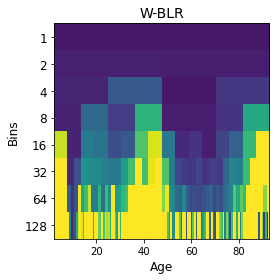

Normal rh_S_interm_prim-Jensen_thickness 0


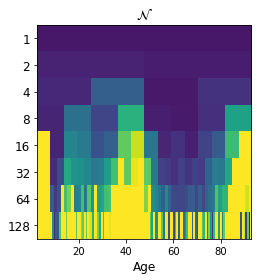

SHASHb_1 rh_S_interm_prim-Jensen_thickness 0


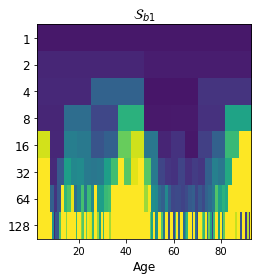

SHASHb_2 rh_S_interm_prim-Jensen_thickness 0


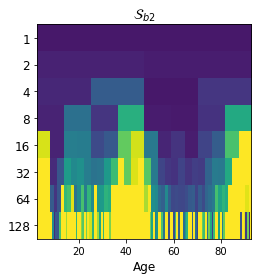

blr rh_S_interm_prim-Jensen_thickness 1


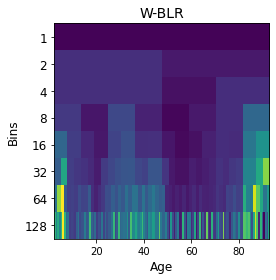

Normal rh_S_interm_prim-Jensen_thickness 1


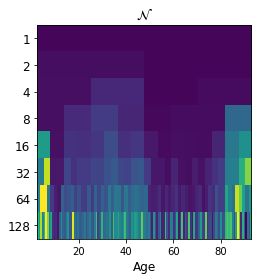

SHASHb_1 rh_S_interm_prim-Jensen_thickness 1


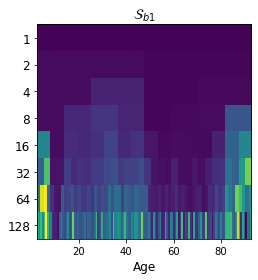

SHASHb_2 rh_S_interm_prim-Jensen_thickness 1


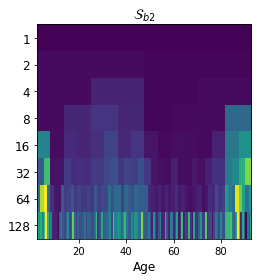

blr rh_S_interm_prim-Jensen_thickness 2


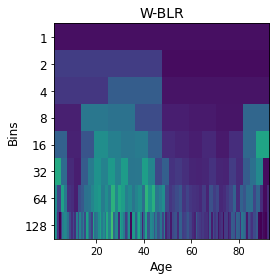

Normal rh_S_interm_prim-Jensen_thickness 2


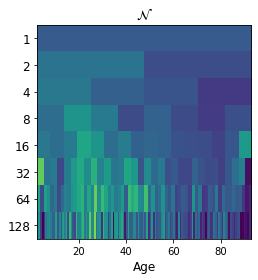

SHASHb_1 rh_S_interm_prim-Jensen_thickness 2


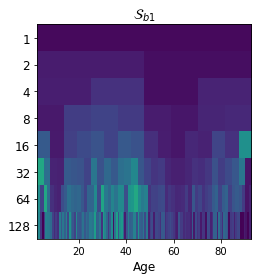

SHASHb_2 rh_S_interm_prim-Jensen_thickness 2


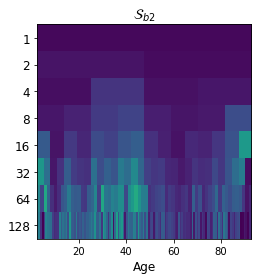

blr rh_S_interm_prim-Jensen_thickness 3


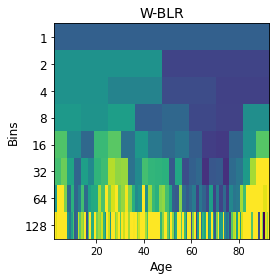

Normal rh_S_interm_prim-Jensen_thickness 3


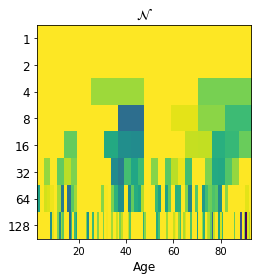

SHASHb_1 rh_S_interm_prim-Jensen_thickness 3


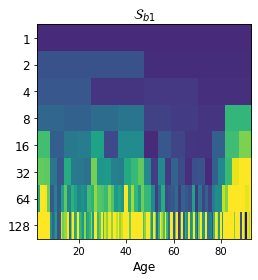

SHASHb_2 rh_S_interm_prim-Jensen_thickness 3


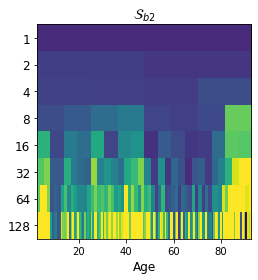

blr Brain-Stem 0


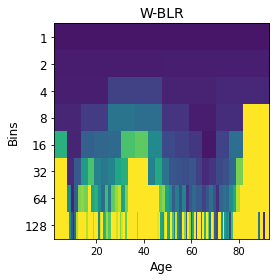

Normal Brain-Stem 0


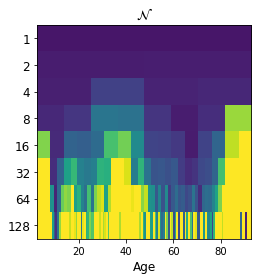

SHASHb_1 Brain-Stem 0


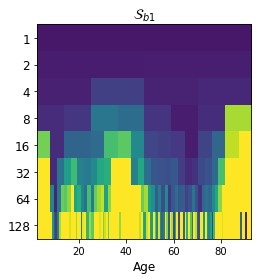

SHASHb_2 Brain-Stem 0


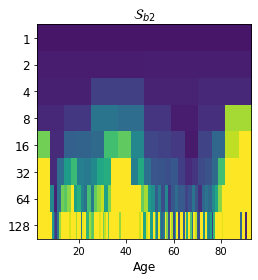

blr Brain-Stem 1


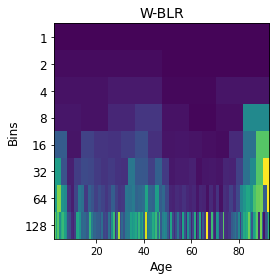

Normal Brain-Stem 1


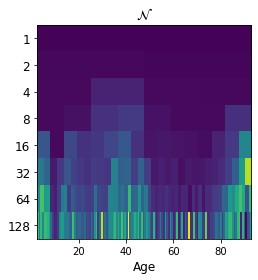

SHASHb_1 Brain-Stem 1


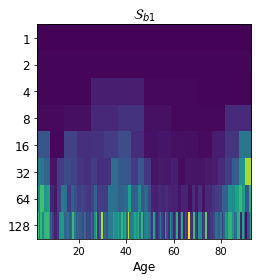

SHASHb_2 Brain-Stem 1


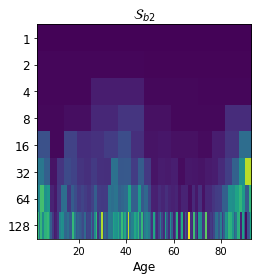

blr Brain-Stem 2


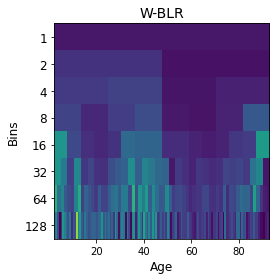

Normal Brain-Stem 2


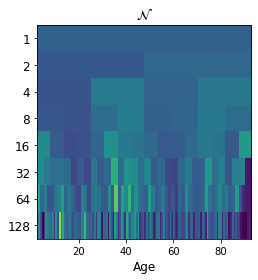

SHASHb_1 Brain-Stem 2


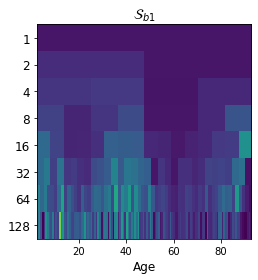

SHASHb_2 Brain-Stem 2


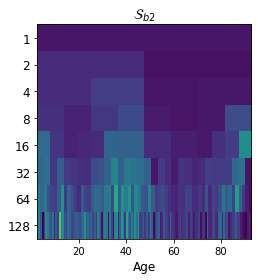

blr Brain-Stem 3


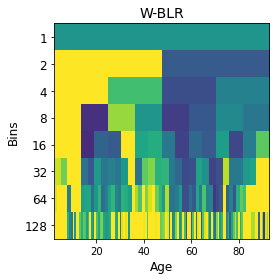

Normal Brain-Stem 3


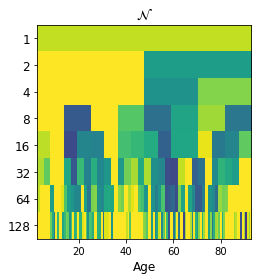

SHASHb_1 Brain-Stem 3


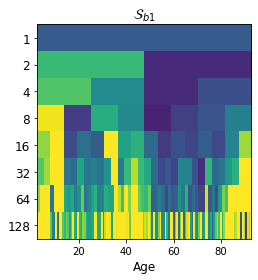

SHASHb_2 Brain-Stem 3


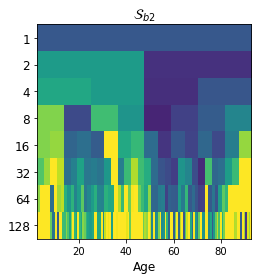

In [13]:
for iff in range(6):
    for m, vlims in enumerate([(0, 0.2),(1., 1.),(0,1),(0, 1)]):
        for lik in ['blr','Normal','SHASHb_1','SHASHb_2']:
            print(lik, features[iff], m)
            make_moments_of_subsets(iff, lik, m+1, vlims=vlims, colorbar = lik=='SHASHb', ylabel=lik=='blr')

In [ ]:
vlims = (0,1)
moment = 4
make_moments_of_subsets(0, 'blr', moment,vlims = vlims)
make_moments_of_subsets(0, 'SHASHb', moment,vlims =vlims)

In [ ]:
feature = 2
func = 5
vlims = (0,1)
make_moments_of_subsets(feature, 'blr', func, vlims=vlims)
make_moments_of_subsets(feature, 'SHASHb', func, vlims=vlims)
make_moments_of_subsets(feature, 'Normal', func, vlims=vlims, colorbar=True)

In [ ]:
feature = 0
func = 3
vlims = (-1,1)
make_moments_of_subsets(feature, 'blr', func, vlims=vlims)
make_moments_of_subsets(feature, 'SHASHb', func, vlims=vlims)
make_moments_of_subsets(feature, 'Normal', func, vlims=vlims, colorbar=True)

In [ ]:

func = 4
vlims = (0,4.)

make_moments_of_subsets(3, 'blr', func, vlims=vlims)
make_moments_of_subsets(3, 'SHASHb', func, vlims=vlims)
make_moments_of_subsets(3, 'Normal', func, vlims=vlims, colorbar=True)

In [ ]:
all_aucs = {}
for iff, feature in enumerate(features):
    for fold in range(10):
        for l in ['SHASHo','SHASHb','Normal','blr']:
            print(f'{fold}, {l}, {feature}')
            aucs = np.zeros((len(unique_classes), len(unique_classes)))
            for i, v in enumerate(unique_classes):
                for j in range(i):
                    if i != j:
                        full_zscores = all_zscores[(fold, iff, l)]
                        classes = foldclasses[fold]
                        
#                         print(classes.shape, full_zscores.shape)
                        idxs = np.where(((classes['site_id'] == i) | (classes['site_id'] == j)))
#                         print(np.max(idxs) > full_zscores.shape[0])
#                             idxs = np.where((classes['sex'] == sex) & ((classes['site_id'] == i) | (classes['site_id'] == j)))

                        selected_zscores = full_zscores[idxs[0]]
                        selected_classes = classes.iloc[idxs[0]]['site_id'].to_numpy()

                        auc = roc_auc_score(selected_classes, selected_zscores)
                        aucs[i,j] = auc
                        aucs[j,i] = auc
            all_aucs[(iff, fold, l)] = aucs
            s = plt.imshow(aucs, vmin = 0, vmax = 1)
#             plt.colorbar(s)
#             plt.title(f'fold {fold}, {l}, feature={feature}')
#             plt.savefig(f'/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/AUC_images/fold{fold}-l{l}-feature={feature}.png',dpi=300)
#             plt.show()

#             plt.close()

In [20]:
blr_storage = None
n_ls = 8
storages = []

func = skew
feature = features.index('WM-hypointensities')
for il, lik in enumerate(['blr','SHASHb_2']):

    storage = np.zeros((n_ls, 2**(n_ls-1)))   
    for fold in range(10):
        z = all_zscores[(fold, feature, lik)]
        X = testXs[fold]
        minx = np.min(X[:,0])
        maxx = np.max(X[:,0]-7)

        for i in range(n_ls):
            l = np.linspace(minx, maxx, 2**i+1, endpoint=True)
            for il in range(2**i):
                idx = np.logical_and((X[:,0] >= l[il]),(X[:,0] <= l[il+1]))
                zs = z[idx]
                if zs.shape[0] > 0:
                    col = np.abs(func(zs)-vlims[0])
                    block_width = storage.shape[1]//(l.shape[0]-1)
                    storage[i,il*block_width:(il+1)*block_width] += col


    storages.append(storage/10)

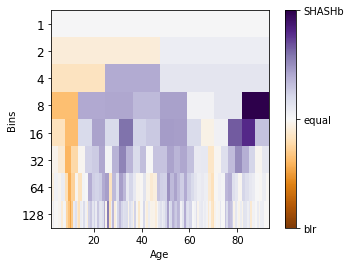

In [21]:

width = maxx-minx
height = n_ls
aspect = width/height
# fig = plt.figure(figsize=(5,5))
cax = plt.imshow(storages[0]-storages[1], aspect= aspect,  vmin=-1, vmax = 1,interpolation='none', cmap='PuOr', extent = [minx, maxx, n_ls, 0])
cb = plt.colorbar(cax, ticks = [-1, 0, 1], )
cb.ax.set_yticklabels(['blr','equal','SHASHb'])
locs, texts = plt.yticks()
ns = locs[:-1]
texts = map(lambda x: int(2**x), ns)

plt.yticks(ns+0.5, texts, fontsize=12)
plt.ylabel('Bins')
plt.xlabel("Age")
plt.savefig(f'/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/subset_moments_images/diff_WMH_skew_blr_SHASHb.png',dpi=300)
# cb.set_yticks([-1,1],['blr','SHASHb'])